# PROJECT 1: IMPACTS OF COVID-19 VACCINATION STATUS

**Note:** Hey Team, Below is a template that I created for us to add our code snippets. Please add additional dependencies as needed. See the order of analysis to find our area. Feel free to change the headings.. this is just a template.

### Description of Project



### Order of Analysis

* COVID-19 Vaccination information for the Unitied States
* COVID-19 Vaccination for Age
* COVID-19 Vaccination for Sex
* COVID-19 Vaccination for Pregnancy
* COVID-19 Vaccination for Race/Ethnicity

## Importing dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

import csv

## COVID-19 Vaccination - United States

### Clean COVID-19 Vaccination Data

### Graphicial Representation of the Data

### COVID Deaths by vaccination status

### Summary Statistics

### Summary Analysis

## COVID-19 Vaccination - Age

### Clean COVID-19 Vaccination Data

### Graphicial Representation of the Data

### COVID Deaths by Age 

### Summary Statistics

### Summary Analysis

## COVID-19 Vaccination - Sex

### Clean COVID-19 Vaccination Data

### Graphicial Representation of the Data

### COVID Deaths by Sex

### Summary Statistics

### Summary Analysis

## COVID-19 Vaccination - Pregnancy

### Clean COVID-19 Vaccination Data

In [3]:
#Create DF
preg_file = "Resources/pregnancy_data5.0.csv"
data_df = pd.read_csv(preg_file)


# Convert the date to datetime64
data_df["Week_Ending_Date"] = pd.to_datetime(data_df["Week_Ending_Date"], format='%Y-%m-%d')

#Filter Vaccinated - All Races
grouped_filter = data_df.groupby(["Week_Ending_Date"])["Vaccination Coverage Amount"].sum()
grouped_filter_df = pd.DataFrame(grouped_filter)
clean_df = grouped_filter_df.reset_index()

<function matplotlib.pyplot.show(*args, **kw)>

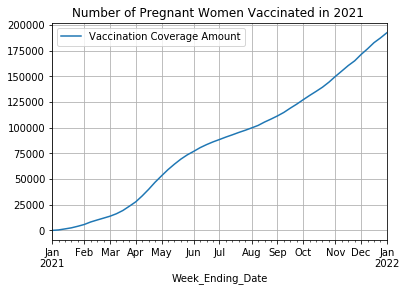

<Figure size 720x1440 with 0 Axes>

In [4]:
#Build Line Plot 
clean_df.plot.line(x="Week_Ending_Date", y="Vaccination Coverage Amount")
plt.title("Number of Pregnant Women Vaccinated in 2021 ")
plt.grid()
plt.figure(figsize=(10,20))
plt.show

In [5]:
#Percentage DF
filter_df = data_df.loc[(data_df["Vaccination Coverage Status"]=="Fully Vaccinated") & (data_df["Race and Ethnicity"]=="All Races/Ethnicity"),: ]
filter_df


amount_week= filter_df.groupby(["Week_Ending_Date"])["Vaccination Coverage Amount"].sum()
amount_by_week2 = pd.DataFrame(amount_week)
amount_by_week = amount_by_week2.reset_index()

denom_week = filter_df.groupby(["Week_Ending_Date"])["Denominator"].value_counts()
denom_by_week2 = pd.DataFrame(denom_week)
del denom_by_week2["Denominator"]
denom_by_week = denom_by_week2.reset_index()

merge = pd.merge(amount_by_week,denom_by_week, on="Week_Ending_Date")

merge['Denominator'] = merge['Denominator'].str.replace(',', '').astype(float)

merge["Vaccinated Coverage Percentage (%)"] = (merge["Vaccination Coverage Amount"] / merge["Denominator"]) *100
merge

,Week_Ending_Date,Vaccination Coverage Amount,Denominator,Vaccinated Coverage Percentage (%)
0,2021-01-02,0,103216.0,0.000000
1,2021-01-09,207,103668.0,0.199676
2,2021-01-16,728,103958.0,0.700283
3,2021-01-23,1249,104115.0,1.199635
4,2021-01-30,2087,104358.0,1.999847
5,2021-02-06,2931,104671.0,2.800203
6,2021-02-13,4187,104669.0,4.000229
7,2021-02-20,5131,104720.0,4.899733
8,2021-02-27,6089,104985.0,5.799876
9,2021-03-06,7045,105151.0,6.699889


<function matplotlib.pyplot.show(*args, **kw)>

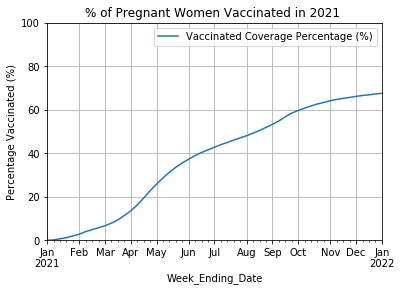

<Figure size 720x1440 with 0 Axes>

In [6]:
#Build Line Plot 
merge.plot.line(x="Week_Ending_Date", y="Vaccinated Coverage Percentage (%)")
plt.title("% of Pregnant Women Vaccinated in 2021 ")
plt.ylim(0,100)
plt.ylabel("Percentage Vaccinated (%)")
plt.grid()
plt.figure(figsize=(10,20))
plt.show

### Graphicial Representation of the Data

<function matplotlib.pyplot.show(*args, **kw)>

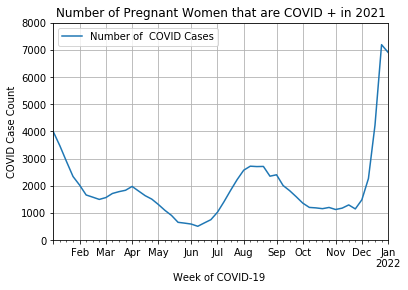

<Figure size 720x1440 with 0 Axes>

In [7]:
#Import COVID Cases Data 

cases_file = "Resources/pregnancy_covid_cases.csv"
cases_df = pd.read_csv(cases_file)

# Convert the date to datetime64
cases_df["Week of COVID-19 "] = pd.to_datetime(cases_df["Week of COVID-19 "], format='%Y-%m-%d')

#Build Line Plot 
cases_df.plot.line(x="Week of COVID-19 ", y='Number of  COVID Cases')
plt.title("Number of Pregnant Women that are COVID + in 2021")
plt.ylim(0,8000)
plt.ylabel("COVID Case Count")
plt.grid()
plt.figure(figsize=(10,20))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

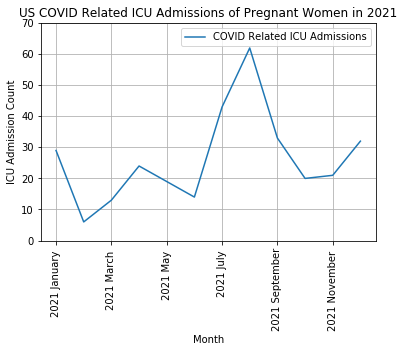

<Figure size 720x1440 with 0 Axes>

In [8]:
#Import COVID ICU/ Death Data 

ICU_file = "Resources/pregnancy_ICU_death.csv"
ICU_df = pd.read_csv(ICU_file)

#Build Line Plot 
ICU_df.plot.line(x="Month", y='COVID Related ICU Admissions')
plt.title("US COVID Related ICU Admissions of Pregnant Women in 2021")
plt.ylim(0,70)
plt.ylabel("ICU Admission Count")
plt.xticks(rotation =90)
plt.grid()
plt.figure(figsize=(10,20))
plt.show

### COVID Deaths by Pregnancy

<function matplotlib.pyplot.show(*args, **kw)>

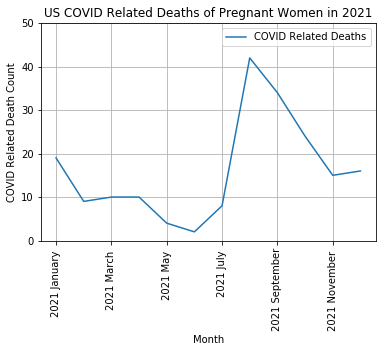

<Figure size 720x1440 with 0 Axes>

In [9]:
#Build Line Plot 
ICU_df.plot.line(x="Month", y='COVID Related Deaths')
plt.title("US COVID Related Deaths of Pregnant Women in 2021")
plt.ylim(0,50)
plt.ylabel("COVID Related Death Count")
plt.xticks(rotation =90)
plt.grid()
plt.figure(figsize=(10,20))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

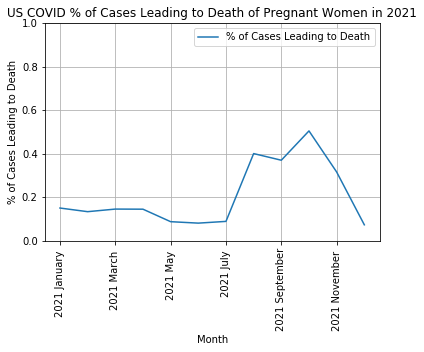

<Figure size 720x1440 with 0 Axes>

In [10]:
#Import COVID ICU/ Death Data 

total_file = "Resources/total_month.csv"
total_df = pd.read_csv(total_file)

total_df["% of Cases Leading to Death"]= (total_df["COVID Related Deaths"]/total_df["COVID Case Count"])*100
total_df

#Build Line Plot 
total_df.plot.line(x="Month", y="% of Cases Leading to Death")
plt.title("US COVID % of Cases Leading to Death of Pregnant Women in 2021")
plt.ylim(0,1)
plt.ylabel("% of Cases Leading to Death")
plt.xticks(rotation =90)
plt.grid()
plt.figure(figsize=(10,20))
plt.show

### Summary Statistics

### Summary Analysis

## COVID-19 Vaccination - Race/Ethnicity

### Clean COVID-19 Vaccination Data

### Graphicial Representation of the Data

### COVID Deaths by Race/Ethnicity

### Summary Statistics

### Summary Analysis